In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

data = pd.read_csv('bias_detection_in_hiring.csv')

In [3]:
# Data Collection and Initial Exploration
print("=== Data Shape ===")
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

print("\n=== Column Names ===")
print(data.columns.tolist())

print("\n=== Data Types ===")
print(data.dtypes)


=== Data Shape ===
Rows: 73462, Columns: 15

=== Column Names ===
['S.No', 'Age', 'Accessibility', 'EdLevel', 'Employment', 'Gender', 'MentalHealth', 'MainBranch', 'YearsCode', 'YearsCodePro', 'Country', 'PreviousSalary', 'HaveWorkedWith', 'ComputerSkills', 'Employed']

=== Data Types ===
S.No                int64
Age                object
Accessibility      object
EdLevel            object
Employment          int64
Gender             object
MentalHealth       object
MainBranch         object
YearsCode           int64
YearsCodePro        int64
Country            object
PreviousSalary    float64
HaveWorkedWith     object
ComputerSkills      int64
Employed            int64
dtype: object


In [4]:
# Missing Value Analysis

# analysing missing values
print("\n=== Missing Values ===")
missing_values = data.isnull().sum()
missing_percentages = (missing_values / len(data)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentages
})
print(missing_df[missing_df['Missing Values'] > 0])

# Drop rows with missing values
data.dropna(inplace=True)

# remove duplicates
data.drop_duplicates()


=== Missing Values ===
                Missing Values  Percentage
HaveWorkedWith              63    0.085759


,S.No,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,73457,<35,No,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,73458,>35,No,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,73459,<35,No,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,73460,<35,Yes,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


In [8]:
# Summary Statistics
print("\n=== Summary Statistics for Numerical Columns ===")
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
print(data[numerical_cols].describe())

# Categorical Variables Analysis
categorical_cols = data.select_dtypes(include=['object']).columns
print("\n=== Categorical Variables Summary ===")
for col in categorical_cols:
    print(f"\nFrequency Distribution for {col}:")
    print(data[col].value_counts().head())
    print(f"Number of unique values: {data[col].nunique()}")



=== Summary Statistics for Numerical Columns ===
               S.No    Employment     YearsCode  YearsCodePro  PreviousSalary  \
count  73399.000000  73399.000000  73399.000000  73399.000000    73399.000000   
mean   36730.320795      0.883132     14.221079      9.100451    67765.625118   
std    21205.730584      0.321265      9.404350      7.960085    49492.292504   
min        0.000000      0.000000      0.000000      0.000000        1.000000   
25%    18367.500000      1.000000      7.000000      3.000000    28860.000000   
50%    36731.000000      1.000000     12.000000      7.000000    57588.000000   
75%    55092.500000      1.000000     20.000000     12.000000    95979.000000   
max    73461.000000      1.000000     50.000000     50.000000   224000.000000   

       ComputerSkills      Employed  
count    73399.000000  73399.000000  
mean        13.439747      0.536683  
std          7.049885      0.498656  
min          1.000000      0.000000  
25%          8.000000      0.0

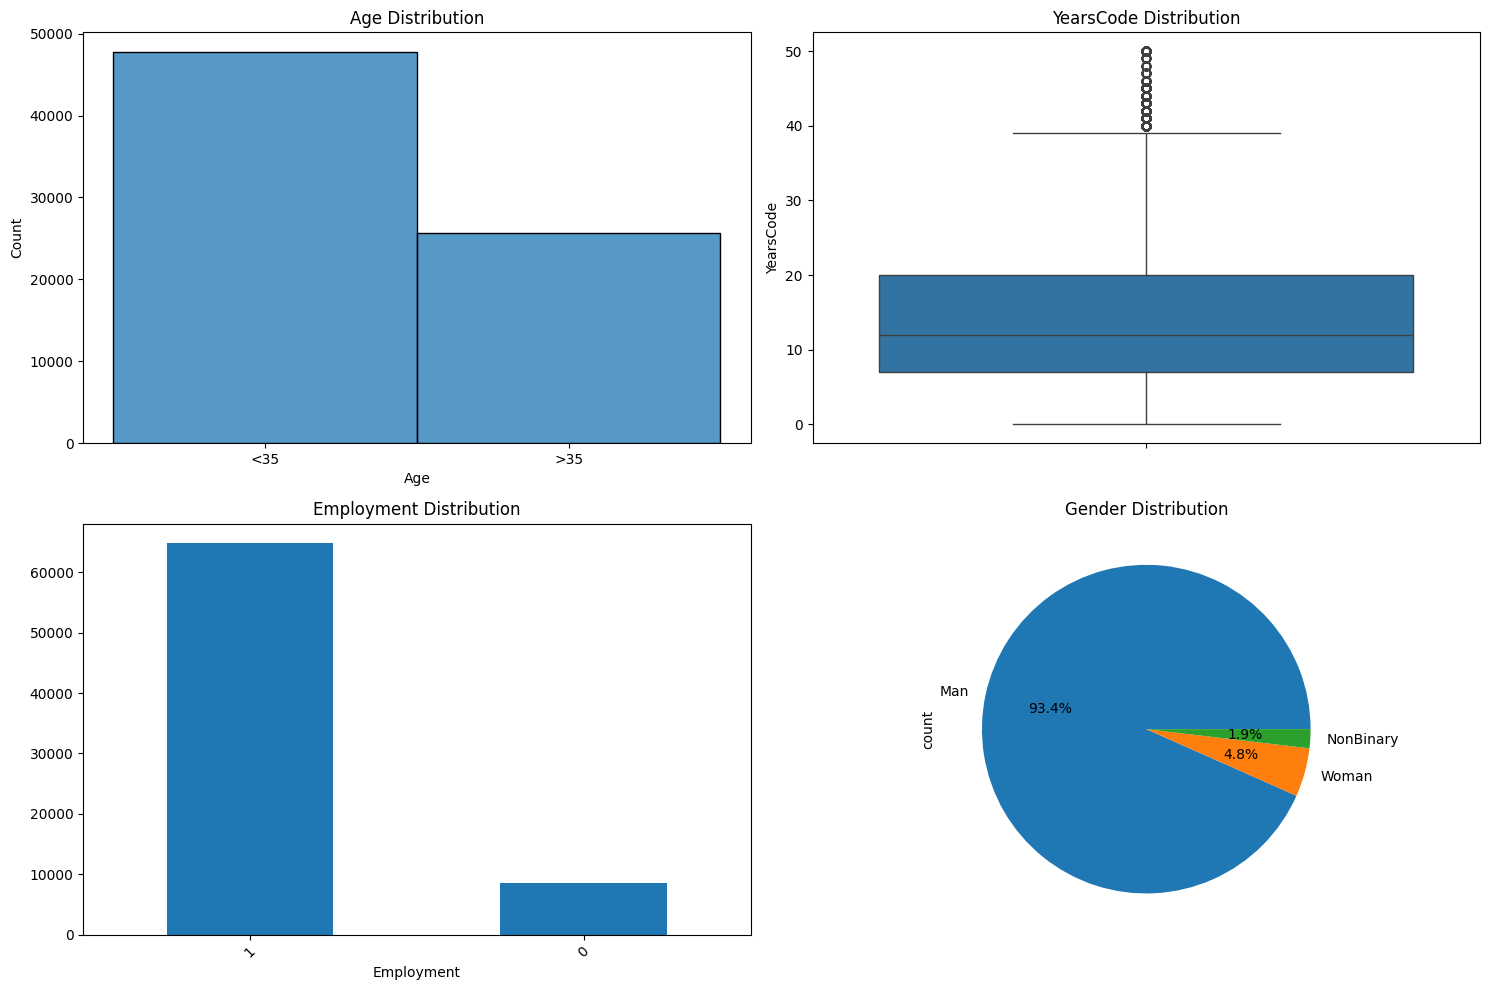

In [9]:
# Visualization
plt.figure(figsize=(15, 10))

# Age Distribution
plt.subplot(2, 2, 1)
sns.histplot(data['Age'], bins=30)
plt.title('Age Distribution')

# YearsCode Distribution
plt.subplot(2, 2, 2)
sns.boxplot(y=data['YearsCode'])
plt.title('YearsCode Distribution')

# Employment Distribution
plt.subplot(2, 2, 3)
data['Employment'].value_counts().plot(kind='bar')
plt.title('Employment Distribution')
plt.xticks(rotation=45)

# Gender Distribution
plt.subplot(2, 2, 4)
data['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')

plt.tight_layout()

Text(0.5, 1.0, 'Correlation Matrix')

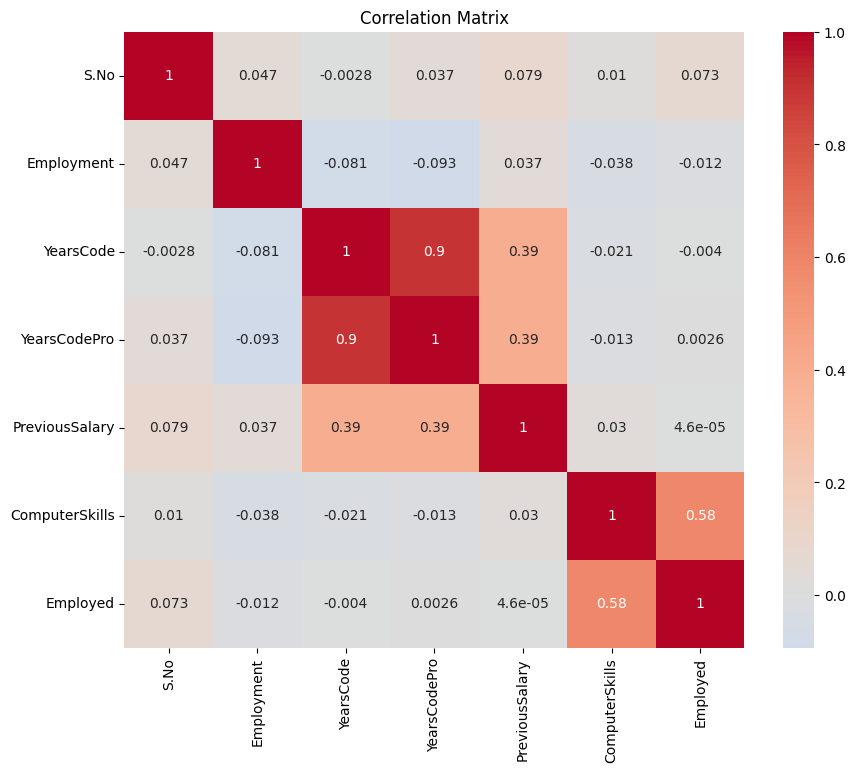

In [10]:
# Correlation Analysis for Numerical Variables
plt.figure(figsize=(10, 8))
numerical_data = data[numerical_cols]
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')


=== Outlier Detection (Z-score method) ===
S.No: 0 outliers detected (z-score > 3)
Employment: 0 outliers detected (z-score > 3)
YearsCode: 642 outliers detected (z-score > 3)
YearsCodePro: 1299 outliers detected (z-score > 3)
PreviousSalary: 240 outliers detected (z-score > 3)
ComputerSkills: 792 outliers detected (z-score > 3)
Employed: 0 outliers detected (z-score > 3)


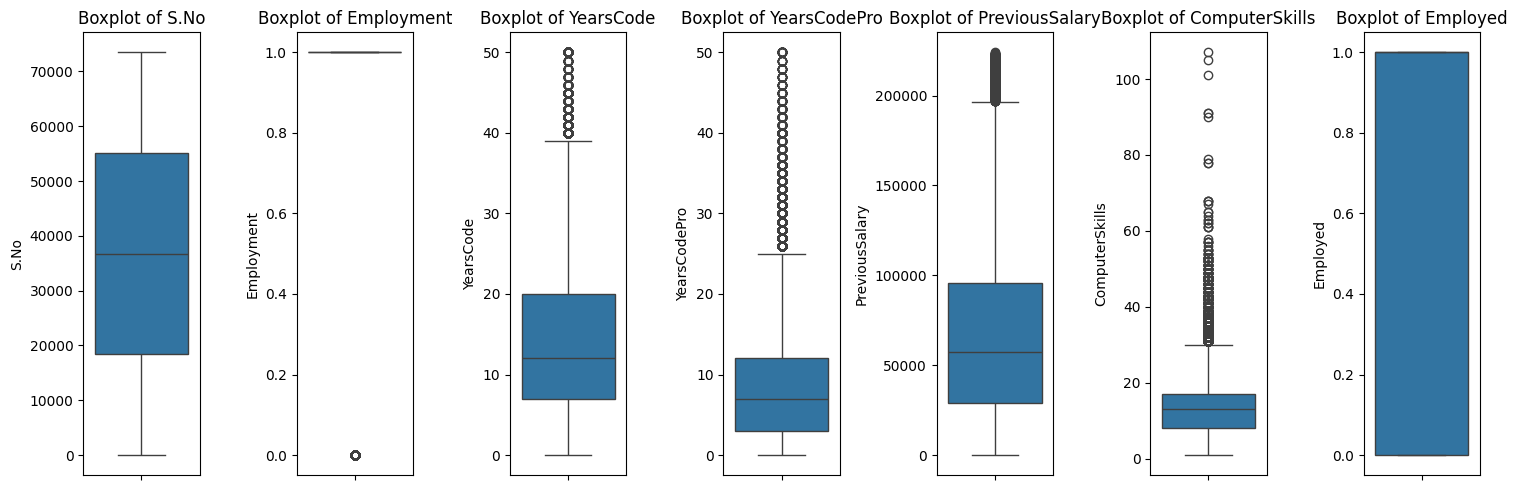

In [16]:
# Outlier Detection
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i+1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()



# Z-score based outlier detection
print("\n=== Outlier Detection (Z-score method) ===")
for col in numerical_cols:
    z_scores = np.abs(stats.zscore(data[col]))
    outliers = len(z_scores[z_scores > 3])
    print(f"{col}: {outliers} outliers detected (z-score > 3)")

In [30]:
from scipy.stats import ttest_ind

male_salary = data[data['Gender'] == 'Man']['PreviousSalary']
female_salary = data[data['Gender'] == 'Woman']['PreviousSalary']



statistic, p_value = ttest_ind(male_salary, female_salary)

# Print the results
print("T-statistic:", statistic)
print("P-value:", p_value)

T-statistic: 3.517316904160783
P-value: 0.0004362011611122033
